In [1]:
import types
import numpy as np
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import cdist

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# concatenate imported DFs Q1~Q4 
df_2017 = pd.concat([df_Q1, df_Q2, df_Q3, df_Q4]) 
df_2017.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


In [4]:
#counts Top 5 stations with the most starts 
top5 = df_2017['from_station_name'].value_counts()
top5 = pd.DataFrame(top5.head())
top5

,from_station_name
Streeter Dr & Grand Ave,97571
Lake Shore Dr & Monroe St,53400
Canal St & Adams St,50911
Clinton St & Washington Blvd,49832
Theater on the Lake,47908


In [5]:
#rename column
top5.rename(columns={'from_station_name':'Counts'}, inplace=True)
#transpose for visualization
top5.transpose()

,Streeter Dr & Grand Ave,Lake Shore Dr & Monroe St,Canal St & Adams St,Clinton St & Washington Blvd,Theater on the Lake
Counts,97571,53400,50911,49832,47908


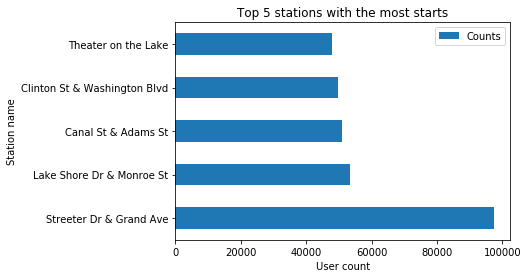

In [6]:
top5.plot.barh()
plt.title('Top 5 stations with the most starts')
plt.xlabel('User count')
plt.ylabel('Station name')
plt.show()

In [7]:
#check usertype value
df_2017['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

In [8]:
df_subscriber = df_2017.loc[df_2017['usertype'] == 'Subscriber']
df_customer = df_2017.loc[df_2017['usertype'] == 'Customer']
df_dependent = df_2017.loc[df_2017['usertype'] == 'Dependent']

In [9]:
#list of trip duration for usertype:Subscriber
subscriber_trip = [
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.median() / 60#trip minutes median
]

#list of trip duration for usertype:Customer
customer_trip = [
    df_2017.loc[df_2017['usertype'] == 'Customer'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.median() / 60#trip minutes median
]

#list of making trip duration for usertype:Dependent
dependent_trip = [
    df_2017.loc[df_2017['usertype'] == 'Dependent'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.median() / 60#trip minutes median
]

In [10]:
#create DataFrame from the lists
df_duration = pd.DataFrame([subscriber_trip,customer_trip,dependent_trip],
                          columns=['Trip Counts','Total Hour','Average minutes','Median minutes'],
                          index=['Subscriber','Customer','Dependent'])
df_duration

,Trip Counts,Total Hour,Average minutes,Median minutes
Subscriber,2992135,584952.101667,11.729794,9.533333
Customer,836872,431472.941389,30.934691,22.816667
Dependent,7,1.461944,12.530952,13.400000


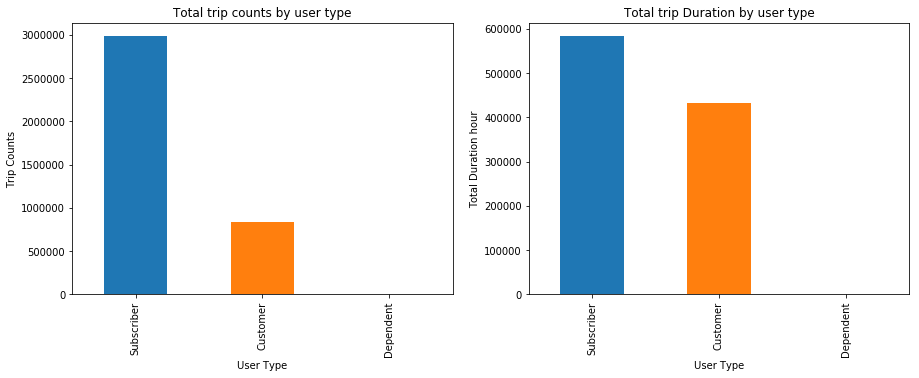

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
df_duration['Trip Counts'].plot.bar()
plt.title('Total trip counts by user type')
plt.xlabel('User Type')
plt.ylabel('Trip Counts')

plt.subplot(1,2,2)
df_duration['Total Hour'].plot.bar()
plt.title('Total trip Duration by user type')
plt.xlabel('User Type')
plt.ylabel('Total Duration hour')

plt.show()

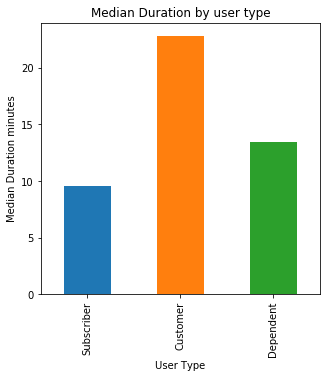

In [12]:
plt.figure(figsize=(5, 5))

df_duration['Median minutes'].plot.bar()
plt.title('Median Duration by user type')
plt.xlabel('User Type')
plt.ylabel('Median Duration minutes')

plt.show()

In [13]:
print(df_stationQ1Q2.shape)
df_stationQ1Q2.head()

(582, 7)


,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18


In [14]:
print(df_stationQ3Q4.shape)
df_stationQ3Q4.head()

(585, 8)


,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18,NaN


In [15]:
#drop unneeded column
df_stationQ3Q4 = df_stationQ3Q4.drop('Unnamed: 7',axis=1)
#concatenate station DFs of Q1~Q4 
df_stations = pd.concat([df_stationQ1Q2, df_stationQ3Q4]) 
#drop duplicates ID
df_stations = df_stations.drop_duplicates('id', keep='last')
#set id column to index as integer
df_stations.index = df_stations['id'].astype(int)

In [16]:
#create DF includes only from_to id
df_from_to = df_2017[['from_station_id','to_station_id']]
#deals both columns as one string separated by comma
df_from_to = df_from_to.astype(str)
df_from_to = df_from_to['from_station_id'] + ',' + df_from_to['to_station_id']

In [17]:
#count each values for searching popular trip
popular_trip = df_from_to.value_counts()
#create DF of top5 trips
popular5 = pd.DataFrame(popular_trip.head())

In [18]:
popular5

,0
"76,35",12171
"35,35",10042
"35,177",8180
"35,268",7993
"268,35",7226


In [19]:
#split back to each ids
pop5_str = popular5.index.str.split(",")

In [20]:
#look for stations that have popular id
df_stations.id = df_stations.id.astype(str)
df_stations[df_stations.id == pop5_str[0][1]]

,id,name,city,latitude,longitude,dpcapacity,online_date
id,,,,,,,
35,35,Streeter Dr & Grand Ave,Chicago,41.892278,-87.612043,47,6/22/2013 21:12


In [21]:
#this is same as top used station
top5.head(1)

,Counts
Streeter Dr & Grand Ave,97571


In [22]:
#top_station = df_stations[df_stations.id == pop5_str[][1]]
#top_station

In [23]:
popular_stations = df_stations[(df_stations.id == pop5_str[0][0])|(df_stations.id == pop5_str[0][1])|(df_stations.id == pop5_str[2][1])|(df_stations.id == pop5_str[3][1])]

In [24]:
popular_stations

,id,name,city,latitude,longitude,dpcapacity,online_date
id,,,,,,,
35,35,Streeter Dr & Grand Ave,Chicago,41.892278,-87.612043,47,6/22/2013 21:12
76,76,Lake Shore Dr & Monroe St,Chicago,41.880958,-87.616743,39,6/26/2013 15:26
177,177,Theater on the Lake,Chicago,41.926277,-87.630834,23,7/19/2013 11:09
268,268,Lake Shore Dr & North Blvd,Chicago,41.911722,-87.626804,39,9/5/2013 9:48


In [25]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

p1 = popular_stations.iloc[0]['latitude'],popular_stations.iloc[0]['longitude']
p2 = popular_stations.iloc[1]['latitude'],popular_stations.iloc[1]['longitude']
p3 = popular_stations.iloc[2]['latitude'],popular_stations.iloc[2]['longitude']
p4 = popular_stations.iloc[3]['latitude'],popular_stations.iloc[3]['longitude']

station_map = folium.Map(location=(p2), zoom_start=13)

#marks the stations' location
folium.Marker(location=(p1), popup='Streeter Dr & Grand Ave',icon=folium.Icon(color='blue')).add_to(station_map)
folium.Marker(location=(p2), popup='Lake Shore Dr & Monroe St',icon=folium.Icon(color='green')).add_to(station_map)
folium.Marker(location=(p3), popup='Theater on the Lake',icon=folium.Icon(color='green')).add_to(station_map)
folium.Marker(location=(p4), popup='Lake Shore Dr & North Blvd',icon=folium.Icon(color='green')).add_to(station_map)

#marks the most popular trip routes
folium.PolyLine(locations=(p2, p1), color='blue').add_to(station_map)
folium.RegularPolygonMarker(location=(p1), fill_color='blue', number_of_sides=3, radius=10, rotation=50).add_to(station_map)

folium.PolyLine(locations=(p1, p3), color='green').add_to(station_map)
folium.RegularPolygonMarker(location=(p3), fill_color='green', number_of_sides=3, radius=10, rotation=0).add_to(station_map)

folium.PolyLine(locations=(p1, p4), color='green').add_to(station_map)
folium.RegularPolygonMarker(location=(p4), fill_color='red', number_of_sides=3, radius=10, rotation=0).add_to(station_map)

folium.PolyLine(locations=(p4, p1), color='red').add_to(station_map)
folium.RegularPolygonMarker(location=(p1), fill_color='red', number_of_sides=3, radius=10, rotation=50).add_to(station_map)

station_map

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  53.72 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.22 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  41.25 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  48.32 MB/s


In [26]:
df_stations.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
id,,,,,,,
2,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43
3,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44
4,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46
5,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46
6,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18


In [177]:
trip_from_ids = np.array(df_2017['from_station_id'])
trip_to_ids = np.array(df_2017['to_station_id'])

trip_from_lat = np.array(df_stations.loc[trip_from_ids]['latitude'])
trip_from_lon = np.array(df_stations.loc[trip_from_ids]['longitude'])
trip_to_lat = np.array(df_stations.loc[trip_to_ids]['latitude'])
trip_to_lon = np.array(df_stations.loc[trip_to_ids]['longitude'])

In [178]:
lat1, lon1, lat2, lon2 = map(np.radians, [trip_from_lat, trip_from_lon, trip_to_lat, trip_to_lon])

dlat = lat2 - lat1
dlon = lon2 - lon1 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a)) 
r = 3956 # Radius of earth in miles
trip_distance = c * r

In [186]:
trip_distance

array([ 2.19891202,  0.48047486,  0.55614896, ...,  0.5736838 ,
        0.62216945,  0.80866829])

In [193]:
trip_duration = np.array(df_2017['tripduration'])
trip_duration = trip_duration / (60*60)

trip_speed = trip_distance/trip_duration

df_2017['trip_distance'] = pd.DataFrame(trip_distance)
df_2017['trip_speed'] = pd.DataFrame(trip_speed)

In [194]:
df_2017.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,trip_distance,trip_speed
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,2.198912,9.236970
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,0.480475,7.329278
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,0.556149,5.753265
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,0.590257,7.378209
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,0.936573,8.124491
